**Pre-Trained Model as Classifier**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dog.jpg to dog (1).jpg
User uploaded file "dog.jpg" with length 84451 bytes


In [ ]:
import tensorflow as tf
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)

91889664/91884032 [==============================] - 2s 0us/step


In [24]:
import cv2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


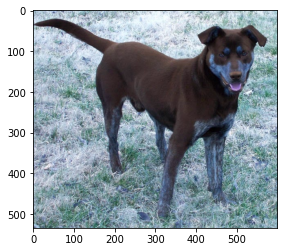

In [25]:
Image=cv2.imread('/content/drive/MyDrive/dog.jpg')
import matplotlib.pyplot as plt
plt.imshow(Image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [29]:
output = cv2.resize(Image,(224,224))

In [30]:
output.shape

(224, 224, 3)

In [31]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(np.array([output]))
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

553467904/553467096 [==============================] - 7s 0us/step
kelpie (48.84%)


**Pre-Trained Model as Feature Extractor Preprocessor**

In [31]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)